In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the path to your training data
train_data_dir = 'train3/114class'

# Define the image size
img_width, img_height = 224, 224

# Function to preprocess the images
def preprocess_images(img):
    img = img.astype('float32')
    img /= 255.0
    return img

# Define the data generators for training and validation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_images,
    validation_split=0.2  # Split the data into 80% training and 20% validation
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=12,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset of the data
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=12,
    class_mode='categorical',
    shuffle=False,
    subset='validation'  # Use the validation subset of the data
)

# list class real name (map_xxx)
keys_list_Start = list(train_generator.class_indices.keys())

number_of_epochs = 60
num_classes = len(train_generator.class_indices)

InceptionV3_model = InceptionV3(input_shape=(img_width,img_height,3),
                                weights='imagenet', 
                                include_top=False,
                                classes=num_classes)

for layer in InceptionV3_model.layers[:249]:
       layer.trainable = False
for layer in InceptionV3_model.layers[249:]:
       layer.trainable = True
        
InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = Flatten()(InceptionV3_last_output)
InceptionV3_x = Dense(1024, activation='relu')(InceptionV3_maxpooled_output)
InceptionV3_x = Dropout(0.5)(InceptionV3_x)
InceptionV3_x = Dense(num_classes, activation='softmax')(InceptionV3_x)
InceptionV3_x_final_model = Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)

inception_filepath = 'inceptionv3_'+'-saved-model-{epoch:02d}-loss-{loss:.2f}.hdf5'
inception_checkpoint = tf.keras.callbacks.ModelCheckpoint(inception_filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
inception_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

number_of_epochs = 36
InceptionV3_x_final_model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), 
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

inceptionv3_history = InceptionV3_x_final_model.fit(train_generator, 
                                                    epochs = number_of_epochs, 
                                                    validation_data = validation_generator,
                                                    callbacks=[inception_checkpoint,
                                                               inception_early_stopping],
                                                    verbose=1)


2023-11-12 18:45:46.010241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 2280 images belonging to 114 classes.
Found 570 images belonging to 114 classes.



KeyboardInterrupt



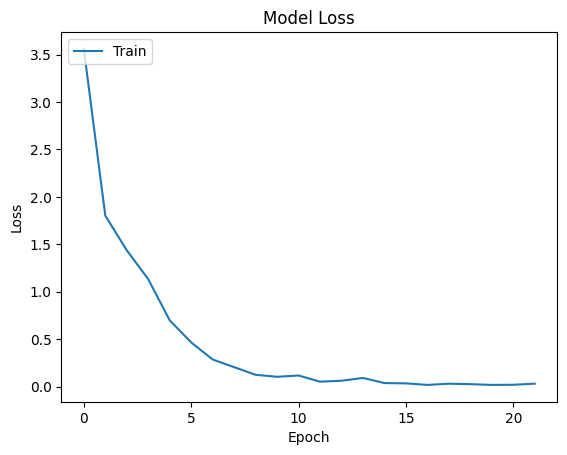

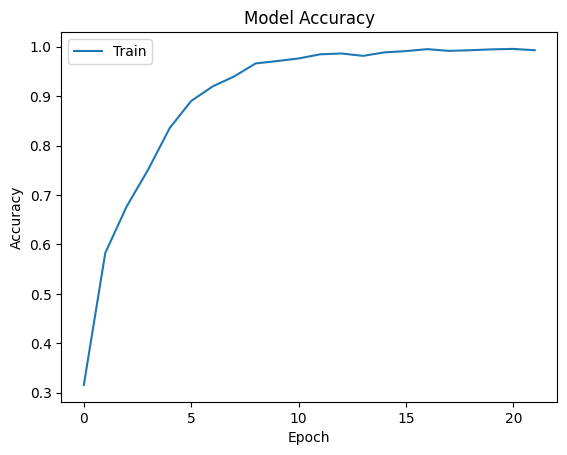

In [10]:
import matplotlib.pyplot as plt
# График потерь
plt.plot(inceptionv3_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# График точности
plt.plot(inceptionv3_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


Found 937 images belonging to 44 classes.
Found 220 images belonging to 44 classes.


In [3]:
# Save pretrained model class names
import json
#num_classes = 10
json_file = f'{num_classes}_class_Names_.json'

with open(json_file, "w") as outfile:
    json.dump(keys_list_Start, outfile)

num_classes = len(train_generator.class_indices)


NameError: name 'num_classes' is not defined

In [4]:
# Сохранение модели
InceptionV3_x_final_model.save(f'{num_classes}_class_InceptionV3_x_final_model.h5')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

num_classes = 14
loaded_model = keras.models.load_model(f'{num_classes}_class_InceptionV3_x_final_model.h5')
#loaded_model.summary()
model = loaded_model

In [2]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

 batch_normalization_99 (BatchN  (None, 25, 25, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 25, 25, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 25, 25, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 25, 25, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                  'activation_112[0][0]']         
                                                                                                  
 conv2d_116 (Conv2D)            (None, 25, 25, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_116 (Batch  (None, 25, 25, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
          

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 12, 12, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 12, 12, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 12, 12, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 12, 12, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 12, 12, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 12, 12, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 5, 5, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 5, 5, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 5, 5, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [5]:
def NMEA_0183_gps(json_data):
# Загрузка данных из JSON
    data = json.loads(json_data)
    #print(data)
# Функция для преобразования долготы/широты в формат NMEA
    def decimal_degrees_to_nmea(degrees):
        degrees_int = int(degrees)
        minutes_decimal = (degrees - degrees_int) * 60
        minutes_int = int(minutes_decimal)
        seconds_decimal = (minutes_decimal - minutes_int) * 60
        return "{:02d}{:02d}.{:04d}".format(degrees_int, minutes_int, int(seconds_decimal * 10000))
# Извлечение данных из JSON
    latitude = data['latitude']
    longitude = data['longitude']
    altitude = data['altitude']
    speed = data['speed']
    timestamp = data['timestamp']
# Преобразование координат в формат NMEA
    latitude_nmea = decimal_degrees_to_nmea(latitude)
    longitude_nmea = decimal_degrees_to_nmea(longitude)
# Формирование строк NMEA
    gga_sentence = "$GPGGA,{},{},{},N,{},E,1,08,0.9,{} M,46.9,M,,,".format(timestamp, latitude_nmea, longitude_nmea, altitude, speed)
    vtg_sentence = "$GPVTG,{}T,0.0,{}N,0.0,{}K,A".format(timestamp, speed, speed)

# Вывод строк NMEA
    return(gga_sentence,vtg_sentence)


In [12]:
model = InceptionV3_x_final_model

In [15]:
from tensorflow.keras.preprocessing import image
import random
import json
import datetime

img_width = 224
img_height = 224

num_classes = 114


def file_number(i):
    if i // 10 == 0:
        num = '00' + str(i)
    elif i // 10 > 0 and i < 100:
        num = '0' + str(i)
    elif i // 100 >= 0:
        num = str(i)
    return(num)

with open(f'{num_classes}_class_Names_.json', 'r') as openfile:
    # Reading from json file
    keys_list = json.load(openfile)
#keys_list
def preprocess_images(img):
    img = img.astype('float32')
    img /= 255.01
    return img
for i in range(46,90):      
    ii = f'simulation/map_{file_number(i)}.jpg'
# Загрузка изображения и преобразование его к размеру, соответствующему обучающим данным
    img = image.load_img(ii, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = preprocess_images(img)
    img = np.expand_dims(img, axis=0)

# Применение модели к изображению
    predictions = model.predict(img, verbose=0)
    # Получение класса с наибольшей вероятностью
    predicted_class = np.argmax(predictions[0])
    class_name = keys_list[predicted_class]
    with open(f'train3/114class/{class_name}/map_000.txt', 'r') as file:
        line = file.readline().strip()  # Считываем первую строку из файла и удаляем пробельные символы
    output = line
    
    # Разделение строки на значения lon и lat
    lon, lat = line.split(';')
    lon = float(lon)
    lat = float(lat)
    #accy = round(predictions[0][predicted_class], 2)
    #print(accy)
    print(ii, f"pred gps : {keys_list[predicted_class]}, {round(predictions[0][predicted_class]*100, 2) } : {output}")
    # Получение текущего времени
    current_timestamp = datetime.datetime.utcnow().isoformat() + 'Z'
# Формирование словаря данных
    data = {
        "latitude": lat,
        "longitude": lon,
        "altitude": 100.0,
        "speed": 60.5,
        "timestamp": current_timestamp
    }
# Преобразование словаря в JSON-строку
    json_data = json.dumps(data)
    (gga_sentence,vtg_sentence) = NMEA_0183_gps(json_data)

    #print(gga_sentence)
    #print(vtg_sentence)
    ## добавить GPRMC
    ## $GNRMC,204520.00,A,5109.0262239,N,11401.8407338,W,0.004,102.3,130522,0.0,E,D*3B



simulation/map_046.jpg pred gps : map_046, 100.0 : 50.463765;30.240493
simulation/map_047.jpg pred gps : map_047, 100.0 : 50.465125;30.23864
simulation/map_048.jpg pred gps : map_048, 100.0 : 50.466485;30.236787
simulation/map_049.jpg pred gps : map_049, 100.0 : 50.467845;30.234934
simulation/map_050.jpg pred gps : map_050, 100.0 : 50.469205;30.233081
simulation/map_051.jpg pred gps : map_051, 100.0 : 50.470565;30.231229
simulation/map_052.jpg pred gps : map_052, 100.0 : 50.471925;30.229376
simulation/map_053.jpg pred gps : map_053, 100.0 : 50.473285;30.227523
simulation/map_054.jpg pred gps : map_054, 100.0 : 50.474645;30.22567
simulation/map_055.jpg pred gps : map_055, 100.0 : 50.476005;30.223817
simulation/map_056.jpg pred gps : map_056, 100.0 : 50.477365;30.221964
simulation/map_057.jpg pred gps : map_057, 100.0 : 50.478725;30.220111
simulation/map_058.jpg pred gps : map_058, 100.0 : 50.480086;30.218258
simulation/map_059.jpg pred gps : map_059, 100.0 : 50.481446;30.216405
simulati

In [26]:
#idclass = np.argmax(predictions[0])
#predictions[0][idclass]
print(idclass, round(predictions[0][idclass], 2))

18 0.44


In [8]:
def file_number(i):
    if i // 10 == 0:
        num = '00' + str(i)
    elif i // 10 > 0 and i < 100:
        num = '0' + str(i)
    elif i // 100 >= 0:
        num = str(i)
    return(num)


In [9]:
#!pip install pydot

In [16]:
##### random test random random ##

from tensorflow.keras.preprocessing import image
import random

# Путь к изображению, которое вы хотите классифицировать
#image_path = ['train2/map_003/map_001.jpg']
#random 
#values_list = list(train_generator.class_indices.values())
values_list = list(range(1, 12))
keys_list = list(train_generator.class_indices.keys())
random_keys = random.choices(keys_list, k=10)

for i in random_keys:
    random_values = random.choices(values_list, k=1)
    if random_values[0] == 0:
        num = '001'
    if random_values[0] // 10 == 0:
        num = '00' + str(random_values[0])
    elif random_values[0] // 10 > 0 and random_values[0] < 100:
        num = '0' + str(random_values[0])
    elif random_values[0] // 100 >= 0:
        num = str(random_values[0])
        
    ii = f'train3/{i}/map_{num}.jpg'
# Загрузка изображения и преобразование его к размеру, соответствующему обучающим данным
    img = image.load_img(ii, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = preprocess_images(img)
    img = np.expand_dims(img, axis=0)

# Применение модели к изображению
    predictions = model.predict(img, verbose=0)

# Получение класса с наибольшей вероятностью
    predicted_class = np.argmax(predictions[0])
    class_name = list(train_generator.class_indices.keys())[predicted_class]
    with open(f'train2/{class_name}/map_001.txt', 'r') as f:
        output = f.read()
    print(ii, f"pred gps |{class_name}:  {output}")

NameError: name 'model' is not defined

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(loaded_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
test_data_dir = 'test'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='categorical'
)

loss, accuracy = model.evaluate(test_generator)
print('Loss:', loss)
print('Accuracy:', accuracy)


In [ ]:
#!pip install opencv-python
#!python --version

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

# Загрузка модели
model = keras.models.load_model('image_similarity_model.h5')
# Define the image size
img_width, img_height = 224, 224

# Function to preprocess the images
def preprocess_images(img):
    img = img.astype('float32')
    img /= 255.0
    return img
# Создание генератора для тестовых данных
test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    preprocessing_function=preprocess_images
)
test_data_dir = 'train'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='categorical'
)

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(test_generator)
print('Loss:', loss)
print('Accuracy:', accuracy)
